In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [42]:
df = pd.read_csv('music_genre.csv')
columns = ['popularity',
           'acousticness', 'danceability', 'duration_ms', 'energy',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'speechiness', 'tempo', 'valence', 'music_genre']
df = df[columns]


In [43]:
df = df.dropna()
df = df[(df['duration_ms']>0) & (df['loudness']<0) & (df['valence']>0)]
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df = df.dropna()
df['tempo'] = df['tempo'].round(2)
encode = ['key', 'mode', 'music_genre']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])

columns_to_normalize = ['popularity',
                        'acousticness', 'danceability', 'duration_ms', 'energy',
                        'instrumentalness', 'liveness', 'loudness',
                        'speechiness', 'valence']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

features = ['popularity',
            'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'valence']

# Features (X) and target (y) variables
X = df[features]
y = df['music_genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation = 'LeakyReLU'))
model.add(Dense(32, activation = 'LeakyReLU'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2, verbose = 1)

Epoch 1/50
406/406 [==============================] - 1s 1ms/step - loss: 2.3908 - accuracy: 0.1603 - val_loss: 2.2208 - val_accuracy: 0.1806
Epoch 2/50
406/406 [==============================] - 0s 1ms/step - loss: 1.9641 - accuracy: 0.2696 - val_loss: 1.8404 - val_accuracy: 0.3087
Epoch 3/50
406/406 [==============================] - 0s 1ms/step - loss: 1.7534 - accuracy: 0.3335 - val_loss: 1.7345 - val_accuracy: 0.3429
Epoch 4/50
406/406 [==============================] - 1s 1ms/step - loss: 1.6239 - accuracy: 0.3797 - val_loss: 1.5845 - val_accuracy: 0.3758
Epoch 5/50
406/406 [==============================] - 0s 1ms/step - loss: 1.5112 - accuracy: 0.4244 - val_loss: 1.4868 - val_accuracy: 0.4135
Epoch 6/50
406/406 [==============================] - 0s 1ms/step - loss: 1.4638 - accuracy: 0.4446 - val_loss: 1.5741 - val_accuracy: 0.3849
Epoch 7/50
406/406 [==============================] - 0s 1ms/step - loss: 1.4219 - accuracy: 0.4591 - val_loss: 1.3941 - val_accuracy: 0.4793
Epoch 

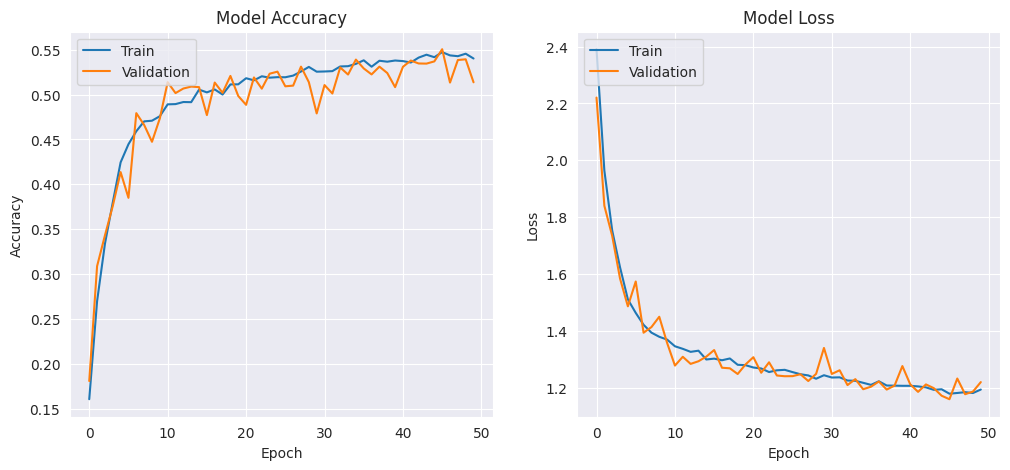

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


254/254 [==============================] - 0s 866us/step


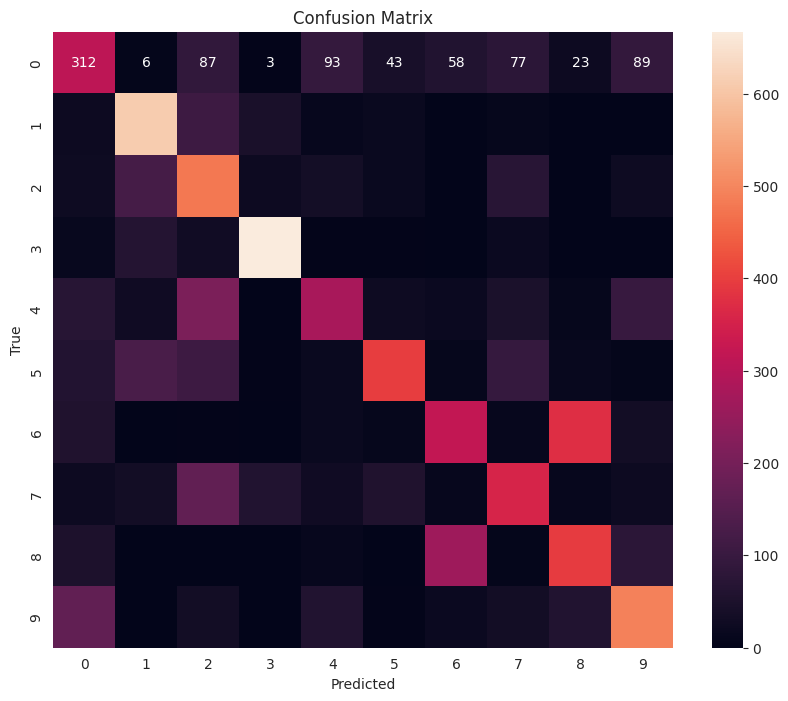

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a test set X_test, y_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Convert predictions to label index
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [49]:
from tensorflow import keras
import numpy  as np
from keras import layers, models
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical

# load data 

(img_height, img_width) = 224,224
data_dir = "brain_tumor_dataset/"

datagen =ImageDataGenerator(
rescale=1./255, validation_split=0.2)
num_class = 2

train_data = datagen.flow_from_directory(
  data_dir,
  (img_height, img_width),
  color_mode='grayscale',
  subset="training",
  batch_size=10,
  shuffle=True)

test_data = datagen.flow_from_directory(
  data_dir,
   (img_height, img_width),
  subset="validation",
  color_mode='grayscale',
  batch_size=10)



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [50]:
from tensorflow.keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu',
                        input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))



model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256, (3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                     

In [52]:


history = model.fit(
    train_data,
    steps_per_epoch=train_data.n//train_data.batch_size,
    epochs=20,
    validation_data=test_data,
    validation_steps=test_data.n//test_data.batch_size)


model.save("brain_tumor3.h5")



Epoch 1/20
20/20 [==============================] - 9s 459ms/step - loss: 0.7100 - accuracy: 0.7358 - val_loss: 0.7142 - val_accuracy: 0.6200
Epoch 2/20
20/20 [==============================] - 10s 496ms/step - loss: 0.6779 - accuracy: 0.7409 - val_loss: 0.7618 - val_accuracy: 0.6200
Epoch 3/20
20/20 [==============================] - 10s 521ms/step - loss: 0.5998 - accuracy: 0.7668 - val_loss: 0.7960 - val_accuracy: 0.6200
Epoch 4/20
20/20 [==============================] - 10s 498ms/step - loss: 0.4994 - accuracy: 0.7876 - val_loss: 0.9482 - val_accuracy: 0.6200
Epoch 5/20
20/20 [==============================] - 10s 481ms/step - loss: 0.4550 - accuracy: 0.8083 - val_loss: 0.7267 - val_accuracy: 0.6200
Epoch 6/20
20/20 [==============================] - 8s 418ms/step - loss: 0.4855 - accuracy: 0.8342 - val_loss: 0.6297 - val_accuracy: 0.6200
Epoch 7/20
20/20 [==============================] - 8s 422ms/step - loss: 0.5181 - accuracy: 0.8187 - val_loss: 0.6188 - val_accuracy: 0.6600
Ep

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


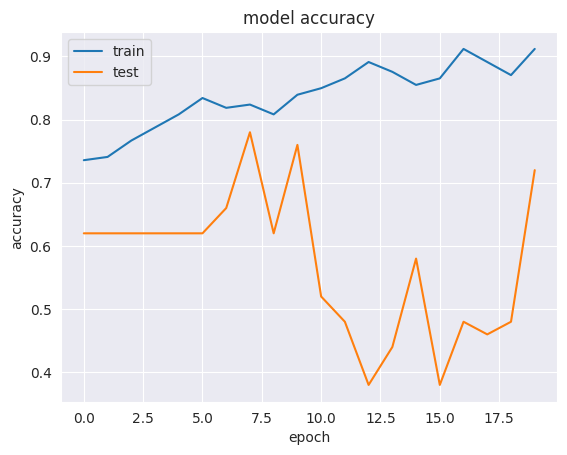

In [53]:


import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [56]:
df = pd.read_csv('Stress.csv')
df = df[['text', 'label']]
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [58]:
import re
import string
import spacy

import nltk
# from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwordf = nltk.corpus.stopwords.words('english')
# porter_stemmer = PorterStemmer()

tokenizer = spacy.load("en_core_web_sm")


def preprocess_text(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation marks
    return text

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define maximum number of words and sequence length
vocab_size = 10000  # This is a hyperparameter
max_length = 100    # This is a hyperparameter

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


[nltk_data] Downloading package stopwords to /home/c1l1r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/c1l1r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/c1l1r/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Model definition
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))  # Embedding layer
model.add(LSTM(64, return_sequences=True))   # LSTM layer, can tweak the number of units
model.add(LSTM(32))                          # Another LSTM layer
model.add(Dense(1, activation='sigmoid'))    # Output layer

# Compile the model
model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 100, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1341857 (5.12 MB)
Trainable params: 1341857 (5.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
history = model.fit(padded_sequences, df['label'], epochs=10, validation_split=0.2)


Epoch 1/10
71/71 [==============================] - 7s 52ms/step - loss: 0.6852 - accuracy: 0.5339 - val_loss: 0.5977 - val_accuracy: 0.7271
Epoch 2/10
71/71 [==============================] - 3s 43ms/step - loss: 0.5436 - accuracy: 0.7634 - val_loss: 0.5149 - val_accuracy: 0.7711
Epoch 3/10
71/71 [==============================] - 3s 42ms/step - loss: 0.4529 - accuracy: 0.8291 - val_loss: 0.5312 - val_accuracy: 0.7606
Epoch 4/10
71/71 [==============================] - 3s 43ms/step - loss: 0.4391 - accuracy: 0.8278 - val_loss: 0.6088 - val_accuracy: 0.7077
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.5276 - accuracy: 0.7335 - val_loss: 0.5907 - val_accuracy: 0.7095
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.5488 - accuracy: 0.7053 - val_loss: 0.6114 - val_accuracy: 0.6725
Epoch 7/10
71/71 [==============================] - 3s 44ms/step - loss: 0.5260 - accuracy: 0.7317 - val_loss: 0.6018 - val_accuracy: 0.7025
Epoch 8/10
71

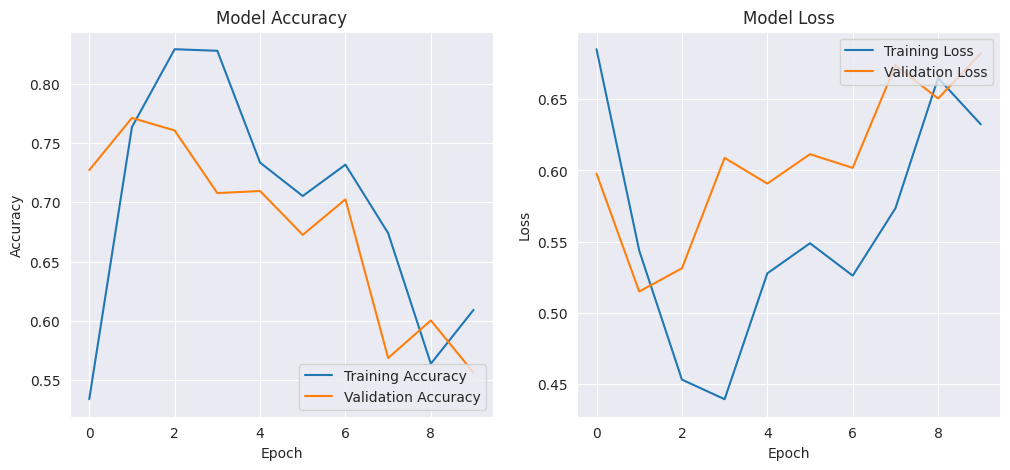

In [62]:
import matplotlib.pyplot as plt

# Assuming history is the return value of model.fit()

# Plot for accuracy
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()
